0.0
10
100
1000
100000
0.01
10
100
1000
100000
0.02
10
100
1000
100000
0.2
10
100
1000
100000
0.35
10
100
1000
100000
0.5
10
100
1000
100000
Test Accuracy
0.9107142857142857
Precision
0.8571428571428571
Recall
0.96


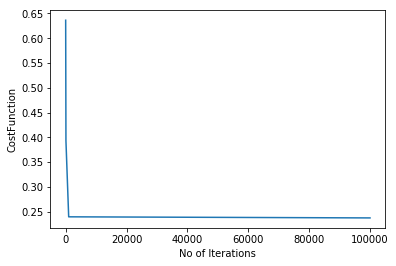

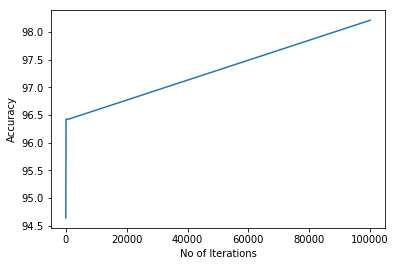

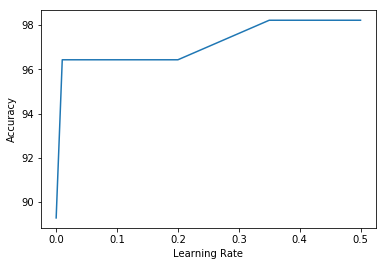

In [5]:
import pandas
import numpy as np
import math
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
from pandas.plotting import parallel_coordinates
from pandas.plotting import scatter_matrix


f1 = "wdbc.dataset"

#train = data.sample(frac=0.8)
def splitData(data,split,splitvt):
    #This function is to split the data based on the 90% criteria for Training,Validation and Test Data
    data = np.array(data)
    normalizeData(data)
    trainf,test = data[:split,:],data[split:,:]
 
    val,train = trainf[:splitvt,:],trainf[splitvt:,:]
    train = np.array(train)
    sizetrain = np.size(train,0)
    idtrain = train[:,0]
    ytrain = train[:,1]
    train = np.delete(train,0,1)
    train = np.delete(train,0,1)
    xtrain = train
    xtrain = np.hstack([np.ones([xtrain.shape[0],1]), xtrain])
    
    val = np.array(val)
    sizeval = np.size(val,0)
    idval = val[:,0]
    yval = val[:,1]
    val = np.delete(val,0,1)
    val = np.delete(val,0,1)
    xval = val
    
    #Padding with a column of 1's for the bias term 
    xval = np.hstack([np.ones([xval.shape[0],1]), xval])
     
    test = np.array(test)
    sizetest = np.size(test,0)
    idtest = test[:,0]
    ytest = test[:,1]
    test = np.delete(test,0,1)
    test = np.delete(test,0,1)
    xtest = test
    
    #Padding with a column of 1's for the bias term 
    xtest = np.hstack([np.ones([xtest.shape[0],1]), xtest])
   
    
    #print("XTRAIN")
    #print(xtrain.shape)
    #print("YTRAIN")
    #print(ytrain.shape)
    #print("XVAL")
    #print(xval.shape)
    #print("YVAL")
    #print(yval.shape)
    #print("Xtest")
    #print(xtest.shape)
    #print("YTEST")
    #print(ytest.shape)
    
    return xtest,ytest,xtrain,ytrain,xval,yval,sizetrain,sizetest,sizeval


#Return sigmoid of function where x can be a matrix 
def sigmoid(z):
    
    r = z.shape[0]
    c = z.shape[1]
    g = np.zeros([r,c])
    for i in range(r):
    	for j in range(c):
            d = (-1*z[i][j])
            g[i,j] = (1/(1+(np.exp(d))))
    return g

#Return sigmoid of a function where z should be scalar
def sigmoidp(z):
    
    d = (-1*z)
    g = (1/(1+(np.exp(d))))
    return g
    
#To convert the value of Y column from M and B to 1 and 0
def convert(y,split):
    #print("CONVERT")
    y = np.array(y.reshape(split,1))
    n = np.size(y,0)
    #print(y.shape)
    for i in range(n):
        if y[i] == 'B':
            y[i] =0
        elif y[i] == 'M':
            y[i] = 1
    return y

#To convert the value of Y column from M and B to 1 and 0
def converttest(y,split,no):
    y = np.array(y.reshape(no-split,1))
    n = np.size(y,0)
    #print(y.shape)
    for i in range(n):
        if y[i] == 'B':
            y[i] =0
        elif y[i] == 'M':
            y[i] = 1
    return y

#To calculate the cost function and gradient descent based on number of iterations
def costFunction(theta, X, y,lamba,features,Jf,i):
  
    m = X.shape[0]
    t = np.transpose(theta)
    h = sigmoid(np.dot(X,t))
    
    
    sumt = 0
    suml = 0
    Y1 = 1-y
    R1 = np.multiply(y,np.log(h))
    R2 = np.multiply(Y1,np.log(1-h))
    R3 = R1 + R2
    sumt = 2* np.sum(R3)
    T3 = np.square(theta) 
    a = T3[0,0]
    T4 = np.sum(T3)-a
    suml = lamba*T4
    J = (((-1)*sumt + suml)/(2*m))
    #This will implement the cost function as mentioned in 4.3
    Jf[i] = J

   
    S = (np.subtract(h,y))
    T1 = np.dot(X.T,S)
    grad = (-lamba/m)*(T1)
    
    thetaT = np.transpose(theta)
    grad = np.add(thetaT,grad)
    grad[0,0] = theta[0,0] - ((lamba/m)*(np.sum(S)))
    grad = np.transpose(grad)
    #This uses the gradient descent as mentioned in 4.4
    return grad

#This function is to normalize the data so as to remove outliners and big values from the dataset
def normalizeData(X):
    dataCopy = X
    c = np.zeros([X.shape[0],1])
    for j in range(2,X.shape[1]):
        c = X[:,j]
        for a in range(c.shape[0]):
           dataCopy[a,j] = (c[a] - np.amin(c)) / (np.amax(c)-np.amin(c))
    
    return random.shuffle(dataCopy)

def calculateparams(xtest,y,noOfIterations,thetaf,features):
    #This is used to calculate precision, precall and recall for the test dataset
    m = np.size(y, 0)
    p = np.zeros([m,1])
    k = np.zeros([m,1])
    thetaft = np.transpose(thetaf)
    thetaft = thetaft.reshape(features,1)
    k = sigmoid(np.dot(xtest,thetaft))
    acc = 0
    pre = 0
    rec = 0
    for i in range(k.shape[0]):
        for j in range(k.shape[1]):
            if (k[i,j] >=0.5): 
                p[i,j] = 1
            else:
                p[i,j] = 0
    
    tn =0
    tp =0
    fn =0
    fp =0
    for j in range(m):
            if p[j] == 1 and y[j] == 1:
                tp=tp+1
            elif p[j] == 0 and y[j] == 0:
                tn = tn+1
            elif p[j] == 0 and y[j] == 1:
                fn = fn +1
            elif p[j] == 1 and y[j] == 0:
                fp = fp +1
          
    if tp+tn+fp+fn != 0:
        acc = (tp+tn)/(tp+tn+fp+fn)
    if tp+fp !=0:
        pre = tp/(tp+fp)
    if tp+fn !=0:
        rec = tp/(tp+fn)
    
    
    return acc,pre,rec
    
def predict(X,y,thetaf,noOfIterations,features,acc):
    #This function is used to calculate the accuracy for each weights from the number of iterations and for the validation data set
    m = np.size(X, 0)
    p = np.zeros([m,noOfIterations])
    k = np.zeros([m,noOfIterations])
  
    k = sigmoid(np.dot(X,np.transpose(thetaf)))
    
    
    for i in range(k.shape[0]):
        for j in range(k.shape[1]):
            if (k[i,j] >=0.5): 
                p[i,j] = 1
            else:
                p[i,j] = 0
   
    for t in range(noOfIterations):
        c = 0 
        w = 0
        prediction = np.array(p[:,t])
       
        for n in range(m):
            if prediction[n] == y[n]:
                c = c+1
            elif prediction[n] != y[n]:
                w = w+1
        acc[0,t] = (c / (m))*100
   
    #to find the first occurance of an item in the vector
def find_first(item, vec,noOfIterations,s):
    for i in range(noOfIterations,s):
        if item == vec[0,i]:
            return i
    return -1


def lr():
   
    data = pandas.read_csv(f1)
    m = data.shape[0] 
    split = int(np.ceil(0.9*m))
    splitvt = m-split
    
    features = data.shape[1]-2
    lambaA = np.array([[0,0.01,0.02,0.2,0.35,0.5]])
    lambaSet = np.size(lambaA)
    noItr = np.array([[10,100,1000,100000]])
    numitr = np.size(noItr)

    accuracyL = np.zeros([1,lambaSet])
    thetaCheck = np.zeros([lambaSet,features+1])
    
    
    accuracy = np.zeros([1,numitr])
    thetaSet = np.zeros([numitr,features+1])
    costFuncSet = np.zeros([1,numitr])
    
    xtest,ytest,xtrain,ytrain,xval,yval,sizetrain,sizetest,sizeval = splitData(data,split,splitvt)
        
    
  
    theta = np.zeros([features+1,1])
    for li in range(lambaSet):
        l = lambaA[0,li]
        print(l)
        for j in range(numitr):
            noOfIterations = noItr[0,j]
            print(noOfIterations)
            Jf = np.zeros([noOfIterations-1])
            thetaf = np.zeros([noOfIterations,features+1])
            thetaf[0,:] = np.reshape(theta, (features+1))
            
            i = 0
                
            acc=np.zeros([1,noOfIterations])
            rw = np.size(xtrain,1)
            ytrain = convert(ytrain,split-splitvt)
            #get the theta iterations in thetaf, then use this to predict acccuracy for validation set
            for i in range(noOfIterations-1):
                tempt = (np.array(thetaf[i,:].reshape(1,features+1)))
                thetaf[i+1,:] = costFunction(tempt, xtrain, ytrain,l,features+1,Jf,i)
                   
            predict(xval,convert(yval,splitvt),thetaf,noOfIterations,features+1,acc)
              
            maxi = np.max(acc)
            result = find_first(maxi,acc,noOfIterations,1)
            accuracy[0,j] = maxi
            thetaSet[j,:] = thetaf[result,:]
            
            minCostF = np.amin(Jf)
            costFuncSet[0,j] = minCostF
            
              
        maxAcc = np.max(accuracy)
        accuracyL[0,li] = maxAcc
        result = find_first(maxAcc,accuracy,noOfIterations,0)
        thetaCheck[li,:] = thetaSet[result,:] 
    
    maxAcc = np.max(accuracyL)
    result = find_first(np.max(accuracyL),accuracyL,lambaSet,0)
    thetaL = thetaCheck[result,:]  
    
    acc,pre,rec = calculateparams(xtest,convert(ytest,splitvt),noOfIterations,thetaL,features+1)
    print("Test Accuracy")
    print(acc)
    print("Precision")
    print(pre)
    print("Recall")
    print(rec)
    
    noItr = noItr.reshape(numitr)
    costFuncSet = costFuncSet.reshape(numitr)
    plt.plot(noItr, costFuncSet)
    plt.xlabel('No of Iterations')
    plt.ylabel('CostFunction')
    plt.show()
    
    
    noItr = noItr.reshape(numitr)
    accuracy = accuracy.reshape(numitr)
    plt.plot(noItr, accuracy)
    plt.xlabel('No of Iterations')
    plt.ylabel('Accuracy')
    plt.show()
   
    lambaA= lambaA.reshape(lambaSet)
    accuracyL = accuracyL.reshape(lambaSet)
    plt.plot(lambaA,accuracyL)
    plt.xlabel('Learning Rate')
    plt.ylabel('Accuracy')
    plt.show()
   
    
    
lr()
